# Tarea 2 - Estadística 
### Problema 1 
Revisaremos el comportamiento empírico de los ensembles GOE, GUE GSE, para lo cual haremos una simulación para matrices de 10x10 y de 100x100, viendo cómo se comportan los eigenvalores en un histograma.

In [1]:
# Importamos librerías
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi


In [2]:
# funciones para construir matrices de los ensembles

def simplectica (n):
    # creas matrices X Y
    X = np.random.normal(0, 1,(n,n)) + 1j * np.random.normal(0, 1,(n,n))
    Y = np.random.normal(0, 1,(n,n)) + 1j * np.random.normal(0, 1,(n,n))
    #unes para primer bloque
    Z = np.concatenate((X,Y), axis=1)
    
    #segundo bloque con los conjugados 
    W = np.concatenate ((-np.conjugate(Y), np.conjugate(X)), axis=1)
    
    #unes todos los bloques
    matSimp = np.concatenate((Z,W), axis=0)
    #sumas su conjugado transpuesto y ya da una matriz simetrica
    matSimetri = (matSimp + np.transpose(np.conj(matSimp)))/2
    return (matSimetri)

def Hermitian (n):
    matHermitian = np.zeros((n,n)) + 1j*np.zeros((n,n)) 
    for i in range(n):
        for k in range(n):
            if k==i:
                matHermitian[i,i] = np.random.normal(0,1) 
            else: 
                if k>i:
                    matHermitian[i,k] = np.random.normal(0,1) + 1j * np.random.normal(0,1)
                else: matHermitian[i,k]= np.conjugate(matHermitian[k,i])
                
    return (matHermitian)



In [4]:
#guardaremos aquí los eigenvalores
# Matriz con entradas reales
eig_GOE_10  = np.empty(0)
eig_GOE_1k  = np.empty(0)

#Matriz hermitiana
eig_GUE_10  = np.empty(0)
eig_GUE_1k  = np.empty(0)

# Matriz simplectica
eig_GSE_10  = np.empty(0)
eig_GSE_1k  = np.empty(0)


In [5]:
#simulacion
for i in range(10000):
    # para p = 10
    
    # Entradas reales 
    H1 = np.random.normal(0, 1,(10,10))
    #Hacemos simetrica
    Hr1 = (H1 + np.transpose(H1) ) / 2
    e1, v1 = np.linalg.eig(Hr1)
    eig_GOE_10  = np.concatenate((eig_GOE_10, e1), axis=None)

    
    #Hermitiana
    H1 =  np.random.normal(0, 1,(10,10)) + 1j * np.random.normal(0, 1,(10,10))
    Hh1 = (H1 + np.conj(np.transpose(H1) )) / 2
    e1, v1 = np.linalg.eig(Hh1)
    eig_GUE_10  = np.concatenate((eig_GUE_10, np.real(e1)), axis=None)
    
    #Simplectica
    Hs1 = simplectica(10)
    e1, v1 = np.linalg.eig(Hs1)
    eig_GSE_10  = np.concatenate((eig_GSE_10, np.real(e1)), axis=None)
    
    # para p = 100
    
    # Entradas reales 
    H2 = np.random.normal(0, 1,(100,100))
    #Hacemos simetrica
    Hr2 = (H2 + np.transpose(H2) ) / 2
    e2, v2 = np.linalg.eig(Hr2)
    eig_GOE_1k  = np.concatenate((eig_GOE_1k, e2), axis=None)

    
    #Hermitiana
    H2 =  np.random.normal(0, 1,(100,100)) + 1j * np.random.normal(0, 1,(100,100))
    Hh2 = (H2 + np.conj(np.transpose(H2) )) / 2
    e2, v2 = np.linalg.eig(Hh2)
    eig_GUE_1k  = np.concatenate((eig_GUE_1k, np.real(e2)), axis=None)
    
    #Simplectica
    Hs2 = simplectica(100)
    e2, v2 = np.linalg.eig(Hs2)
    eig_GSE_1k  = np.concatenate((eig_GSE_1k, np.real(e2)), axis=None)
    
 

In [6]:
# normalizamos
eig_GOE_10 = eig_GOE_10 / np.sqrt(10 * 1)
eig_GUE_10 = eig_GUE_10 / np.sqrt(10 * 2)
eig_GSE_10 = eig_GSE_10 / np.sqrt(10 * 3)

eig_GOE_1k = eig_GOE_1k / np.sqrt(100 * 1)
eig_GUE_1k = eig_GUE_1k / np.sqrt(100 * 2)
eig_GSE_1k = eig_GSE_1k / np.sqrt(100 * 3)



In [7]:
#semicirculo teorico
x = np.linspace(start = -np.sqrt(2)+.0001, stop =np.sqrt(2)-.0001 , num = 1000)
teorico = (1/pi) * np.sqrt(2-x**2)


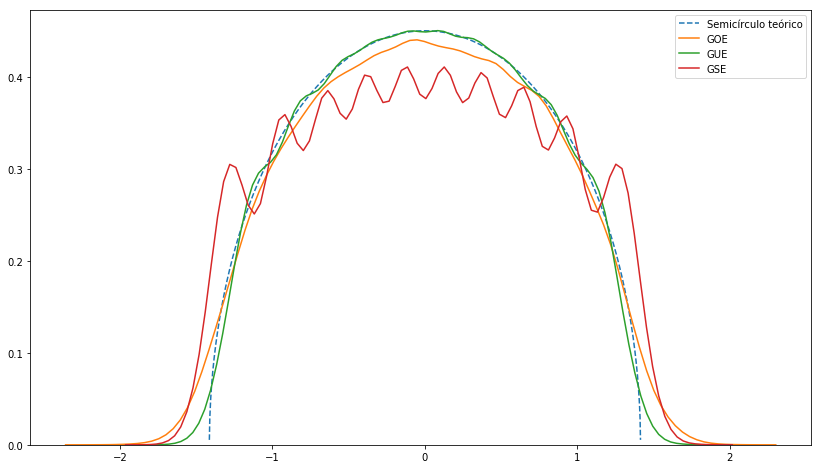

In [15]:
#para n=10
plt.figure(figsize=(14, 8))      
plt.plot( x, teorico, '--', label = "Semicírculo teórico")
sns.distplot(eig_GOE_10, rug=False, hist=False, label = "GOE")
sns.distplot(eig_GUE_10, rug=False, hist=False, label = "GUE")    
sns.distplot(eig_GSE_10, rug=False, hist=False, label = "GSE")    


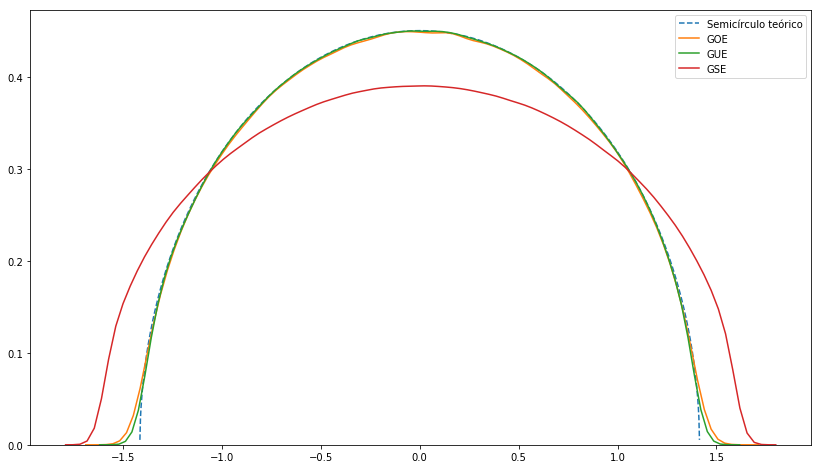

In [16]:
#para n=100
plt.figure(figsize=(14, 8))      
plt.plot( x, teorico, '--', label = "Semicírculo teórico")
sns.distplot(eig_GOE_1k, rug=False, hist=False, label = "GOE")
sns.distplot(eig_GUE_1k, rug=False, hist=False, label = "GUE")    
sns.distplot(eig_GSE_1k, rug=False, hist=False, label = "GSE")   

### Problema 2 
Para este ejercicio vamos revisar la distribución de $s=\lambda_2 - \lambda_1$ pero a como vimos en clase, veremos el espaciamiento promedio de niveles, y haremos la comparación con esta diferencia para una matriz de 100x100

In [17]:
difer_agr = np.empty(0)

for j in range(1000):
    H = np.random.normal(0, 1,(100,100))
    #matriz simetrica
    Hs = (H + np.transpose(H) ) / 2
    #eigenvalores
    es, vs = np.linalg.eig(Hs)
    #Ordeno eigenvalores
    esorder = -np.sort(-es)
    #saco las diferencias y los voy guardando en difer_agr
    difer_agr =  np.concatenate((difer_agr, esorder[:-1] - esorder[1:] ) , axis=None)



In [18]:
s = np.linspace(start = 0, stop= 4 , num = 1000)
conjetura = (pi*s /2 ) * np.exp((-pi*s**2)/4)             


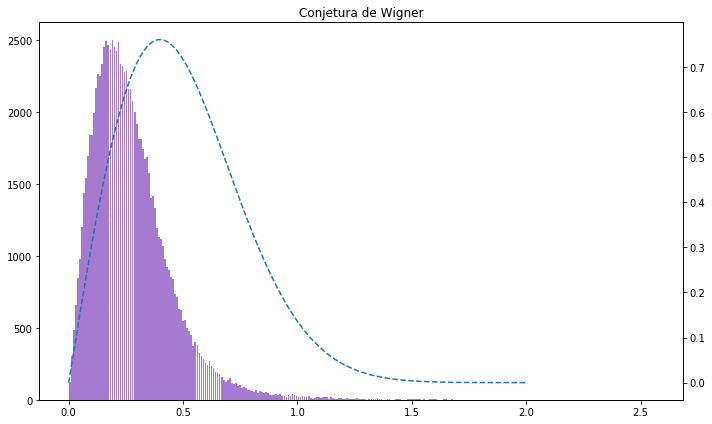

In [19]:
fig, ax1 = plt.subplots(figsize=(10,6))
plt.title('Conjetura de Wigner');
ax1.hist(difer_agr,  bins='auto',rwidth=0.85, color = "#a67ad0")
ax1.tick_params(axis='y')
ax2 = ax1.twinx()  
ax2.plot( s/np.mean(s), conjetura, '--')   
fig.tight_layout()
plt.show()